In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt

base_path = "DS"
eeg_labels = [
    "F3","F1","Fz","F2","F4","FFC5h","FFC3h","FFC1h","FFC2h","FFC4h","FFC6h",
    "FC5","FC3","FC1","FCz","FC2","FC4","FC6","FTT7h","FCC5h","FCC3h","FCC6h",
    "FTT8h","C5","C3","C1","Cz","C2","C4","C6","TTP7h",
    "CCP5h","CCP3h","CCP1h","CCP2h","CCP4h","CCP6h","TTP8h","CP5","CP3","CP1",
    "CPz","CPP5h","CPP3h","CPP1h","CPP2h","CPP4h","CPP6h","P3","P1","Pz","P2","P4","PPO1h",
    "PPO2h"
]

events_required = [1,2,3,4,5,6,7]

# ─── 1) Load one example file to inspect sampling rate and events ──────────
gdf_path = "DS/S1_MI/motorimagination_subject1_run3.gdf"
# Load the raw data without preloading to inspect events
raw = mne.io.read_raw_gdf(gdf_path, preload=True)
# 3) Intersect with the channels actually present in the file
present = set(raw.info['ch_names'])
to_keep = [ch for ch in eeg_labels if ch in present]
# 4) Pick only those
raw.pick_channels(to_keep)

#filter noise 
raw.filter(l_freq=0.5, h_freq=50)
# downsample the data to 128 Hz
#raw.resample(128, npad="auto")
# Pick EEG channels defined by eeg_labels
print(f"Shape of the data (EEG only): {raw.get_data().shape}")
# Check the number of channels
print(f"Number of channels (EEG only): {len(raw.ch_names)}")
# Check the channel names
print(f"Channel names (EEG only): {raw.ch_names}")

Extracting EDF parameters from d:\CP Solves\CP Solves\EEG_Classifications\DS\S1_MI\motorimagination_subject1_run3.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
F3, F1, Fz, F2, F4, FFC5h, FFC3h, FFC1h, FFC2h, FFC4h, FFC6h, FC5, FC3, FC1, FCz, FC2, FC4, FC6, FTT7h, FCC5h, FCC3h, FCC1h, FCC2h, FCC4h, FCC6h, FTT8h, C5, C3, C1, Cz, C2, C4, C6, TTP7h, CCP5h, CCP3h, CCP1h, CCP2h, CCP4h, CCP6h, TTP8h, CP5, CP3, CP1, CPz, CP2, CP4, CP6, CPP5h, CPP3h, CPP1h, CPP2h, CPP4h, CPP6h, P3, P1, Pz, P2, P4, PPO1h, PPO2h, eog-l, eog-m, eog-r, thumb_near, thumb_far, thumb_index, index_near, index_far, index_middle, middle_near, middle_far, middle_ring, ring_near, ring_far, ring_little, litte_near, litte_far, thumb_palm, wrist_bend, roll, pitch, gesture, armeodummy, armeodummy, armeodummy, armeodummy, armeodummy, armeodummy, armeodummy, armeodummy, armeodummy, armeodummy, armeodummy, armeodummy, armeodummy
Crea

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'armeodummy'}. Applying running numbers for duplicates.
  next(self.gen)


Reading 0 ... 165887  =      0.000 ...   323.998 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 3381 samples (6.604 s)

Shape of the data (EEG only): (55, 165888)
Number of channels (EEG only): 55
Channel names (EEG only): ['F3', 'F1', 'Fz', 'F2', 'F4', 'FFC5h', 'FFC3h', 'FFC1h', 'FFC2h', 'FFC4h', 'FFC6h', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FTT7h', 'FCC5h', 'FCC3h', 'FCC6h', 'FTT8h', 'C5', 'C3', 'C1',

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


In [2]:
# Check the sampling rate
print(f"Sampling rate: {raw.info['sfreq']} Hz")

Sampling rate: 512.0 Hz


In [3]:
# 2. Extract annotations and events
annotations = raw.annotations
print("\nAnnotations:\n", annotations)


Annotations:
 <Annotations | 294 segments: 1536 (6), 1537 (6), 1538 (6), 1539 (6), 1540 ...>


In [6]:
#no. of events and unique event types
events, event_id = mne.events_from_annotations(raw)

Used Annotations descriptions: ['1536', '1537', '1538', '1539', '1540', '1541', '1542', '33536', '33554', '34304', '34305', '34306', '34307', '34308', '34309', '34310', '768', '785', '786']


In [7]:
# Check the sampling rate per event
for event in events:
    event_type = event[2]
    event_time = event[0] / raw.info['sfreq']
    print(f"Event: {event_type}, Time: {event_time:.2f} seconds")

Event: 17, Time: 5.00 seconds
Event: 18, Time: 5.00 seconds
Event: 19, Time: 5.00 seconds
Event: 2, Time: 7.00 seconds
Event: 8, Time: 10.00 seconds
Event: 9, Time: 10.00 seconds
Event: 11, Time: 10.00 seconds
Event: 17, Time: 12.43 seconds
Event: 18, Time: 12.43 seconds
Event: 19, Time: 12.43 seconds
Event: 3, Time: 14.43 seconds
Event: 8, Time: 17.43 seconds
Event: 9, Time: 17.43 seconds
Event: 12, Time: 17.43 seconds
Event: 17, Time: 19.89 seconds
Event: 18, Time: 19.89 seconds
Event: 19, Time: 19.89 seconds
Event: 1, Time: 21.89 seconds
Event: 8, Time: 24.89 seconds
Event: 9, Time: 24.89 seconds
Event: 10, Time: 24.89 seconds
Event: 17, Time: 27.54 seconds
Event: 18, Time: 27.54 seconds
Event: 19, Time: 27.54 seconds
Event: 5, Time: 29.54 seconds
Event: 8, Time: 32.54 seconds
Event: 9, Time: 32.54 seconds
Event: 14, Time: 32.54 seconds
Event: 17, Time: 34.98 seconds
Event: 18, Time: 34.98 seconds
Event: 19, Time: 34.98 seconds
Event: 1, Time: 36.98 seconds
Event: 8, Time: 39.98 sec

In [8]:
#frequency of events
event_counts = {}
for event in events:
    event_type = event[2]
    if event_type not in event_counts:
        event_counts[event_type] = 0
    event_counts[event_type] += 1
print("\nEvent counts:")
for event_type, count in event_counts.items():
    print(f"{event_type}: {count} occurrences")


Event counts:
17: 42 occurrences
18: 42 occurrences
19: 42 occurrences
2: 6 occurrences
8: 42 occurrences
9: 42 occurrences
11: 6 occurrences
3: 6 occurrences
12: 6 occurrences
1: 6 occurrences
10: 6 occurrences
5: 6 occurrences
14: 6 occurrences
4: 6 occurrences
13: 6 occurrences
6: 6 occurrences
15: 6 occurrences
7: 6 occurrences
16: 6 occurrences


In [9]:
# Map numeric event codes 1536–1542 to labels 1–7
code_to_label = {code: idx+1 for idx, code in enumerate(sorted(event_id.values()))}
# 2) Count occurrences for events 1–7
labels = [code_to_label[code] for code in events[:,2] if code in code_to_label]
counts = {label: labels.count(label) for label in sorted(set(labels))}
print("\nEvent counts for labels :", counts)


Event counts for labels : {1: 6, 2: 6, 3: 6, 4: 6, 5: 6, 6: 6, 7: 6, 8: 42, 9: 42, 10: 6, 11: 6, 12: 6, 13: 6, 14: 6, 15: 6, 16: 6, 17: 42, 18: 42, 19: 42}


In [10]:
#define the window size
tmin = -1.0
tmax = 1.5      
# Create epochs only for events 1–7
# Create a list of events for the required event IDs
# The events are already in the correct format, so we can directly use them
epochs = mne.Epochs(raw, events, events_required, tmin, tmax, baseline=(None, 0), preload=True, event_repeated='merge')  
# Check the number of epochs created
print(f"\nNumber of epochs created: {len(epochs)}")
# Check the shape of the data
# The shape of the data is (n_epochs, n_channels, n_times)
print(f"Shape of the data: {epochs.get_data().shape}")
# Check the number of channels
# The number of channels is equal to the number of EEG labels
print(f"Number of channels: {len(epochs.ch_names)}")
# Check the channel names
print(f"Channel names: {epochs.ch_names}")
# Check the event IDs
print(f"Event IDs: {epochs.event_id}")

Not setting metadata
42 matching events found
Setting baseline interval to [-1.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 42 events and 1281 original time points ...
0 bad epochs dropped

Number of epochs created: 42
Shape of the data: (42, 55, 1281)
Number of channels: 55
Channel names: ['F3', 'F1', 'Fz', 'F2', 'F4', 'FFC5h', 'FFC3h', 'FFC1h', 'FFC2h', 'FFC4h', 'FFC6h', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FTT7h', 'FCC5h', 'FCC3h', 'FCC6h', 'FTT8h', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'TTP7h', 'CCP5h', 'CCP3h', 'CCP1h', 'CCP2h', 'CCP4h', 'CCP6h', 'TTP8h', 'CP5', 'CP3', 'CP1', 'CPz', 'CPP5h', 'CPP3h', 'CPP1h', 'CPP2h', 'CPP4h', 'CPP6h', 'P3', 'P1', 'Pz', 'P2', 'P4', 'PPO1h', 'PPO2h']
Event IDs: {'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7}


In [14]:
#trials of each event
# Create a dictionary to store the trials for each event
trials = {event: [] for event in events_required}
# Iterate through the epochs and store the trials for each event
for i in range(len(epochs)):
    event_id = epochs.events[i, 2]
    if event_id in trials:
        trials[event_id].append(epochs[i])
# Print the number of trials for each event
for event, trial_list in trials.items():
    print(f"Event {event}: {len(trial_list)} trials")
# Print the shape of the trial for each event
for event, trial_list in trials.items():
    if trial_list:
        print(f"Event {event}: Shape of first trial: {trial_list[0].get_data().shape}")
    else:
        print(f"Event {event}: No trials available")


Event 1: 6 trials
Event 2: 6 trials
Event 3: 6 trials
Event 4: 6 trials
Event 5: 6 trials
Event 6: 6 trials
Event 7: 6 trials
Event 1: Shape of first trial: (1, 55, 1281)
Event 2: Shape of first trial: (1, 55, 1281)
Event 3: Shape of first trial: (1, 55, 1281)
Event 4: Shape of first trial: (1, 55, 1281)
Event 5: Shape of first trial: (1, 55, 1281)
Event 6: Shape of first trial: (1, 55, 1281)
Event 7: Shape of first trial: (1, 55, 1281)


In [15]:
#check trials for each event
for event, trial_list in trials.items():
    print(f"Event {event}:")
    for i, trial in enumerate(trial_list):
        print(f"  Trial {i+1}: Shape: {trial.get_data().shape}")
        print(f"  Data: {trial.get_data()}")
        print(f"  Time vector: {trial.times}")
        print(f"  Event ID: {trial.events[0][2]}")
        print(f"  Annotations: {trial.annotations}")
        print()


Event 1:
  Trial 1: Shape: (1, 55, 1281)
  Data: [[[ 19.71384662  19.77342593  19.38285641 ...  19.62807631  17.99473175
    16.96009224]
  [ 16.58792241  15.60483932  14.80331406 ...   1.88144768   0.92766862
     0.47953183]
  [ 15.04328427  14.39648923  13.65214348 ...  -5.42618576  -6.52751643
    -7.07385668]
  ...
  [ 11.229191    10.20405696   7.7174543  ...  -8.68627756  -9.5735869
   -10.41263264]
  [ 11.98500989  11.98184415  10.80356727 ...  -6.81667166  -7.81495313
    -8.61146148]
  [ 15.27353151  14.69547088  12.90300907 ...  -6.68488231  -7.8385223
    -8.51667507]]]
  Time vector: [-1.         -0.99804688 -0.99609375 ...  1.49609375  1.49804688
  1.5       ]
  Event ID: 1
  Annotations: <Annotations | 294 segments: 1536 (6), 1537 (6), 1538 (6), 1539 (6), 1540 ...>

  Trial 2: Shape: (1, 55, 1281)
  Data: [[[ 19.24186515  17.21647663  14.74829086 ... -52.72070637 -53.00182931
   -53.51381185]
  [  9.27505134   6.55394278   3.04043232 ... -43.31568091 -44.29567962
   -45.

In [16]:
# ─── 3) Count NaNs & zeros per event and channel ────────────────────────────
for lab, data in trials.items():
    if not data:  # Skip if there are no trials for the event
        continue
    nan_counts = []
    zero_counts = []
    for trial in data:
        trial_data = trial.get_data()  # Get the data for the trial
        nan_counts.append(np.isnan(trial_data).sum(axis=2))  # Count NaNs
        zero_counts.append((trial_data == 0).sum(axis=2))    # Count zeros
    nan_counts = np.mean(nan_counts, axis=0)  # Average across trials
    zero_counts = np.mean(zero_counts, axis=0)
    print(f"\nEvent {lab}:")
    print("  Avg NaNs per channel:", nan_counts)
    print("  Avg zeros per channel:", zero_counts)


Event 1:
  Avg NaNs per channel: [[213.5 213.5 213.5 213.5 213.5 213.5 213.5 213.5 213.5 213.5 213.5 213.5
  213.5 213.5 213.5 213.5 213.5 213.5 213.5 213.5 213.5 213.5 213.5 213.5
  213.5 213.5 213.5 213.5 213.5 213.5 213.5 213.5 213.5 213.5 213.5 213.5
  213.5 213.5 213.5 213.5 213.5 213.5 213.5 213.5 213.5 213.5 213.5 213.5
  213.5 213.5 213.5 213.5 213.5 213.5 213.5]]
  Avg zeros per channel: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]]

Event 2:
  Avg NaNs per channel: [[213.5 213.5 213.5 213.5 213.5 213.5 213.5 213.5 213.5 213.5 213.5 213.5
  213.5 213.5 213.5 213.5 213.5 213.5 213.5 213.5 213.5 213.5 213.5 213.5
  213.5 213.5 213.5 213.5 213.5 213.5 213.5 213.5 213.5 213.5 213.5 213.5
  213.5 213.5 213.5 213.5 213.5 213.5 213.5 213.5 213.5 213.5 213.5 213.5
  213.5 213.5 213.5 213.5 213.5 213.5 213.5]]
  Avg zeros per channel: [[0. 0. 0. 0. 0. 0. 0. 0.

In [17]:
# ─── 4) Impute NaNs & zeros via rolling mean (window=5) ────────────────────
import pandas as pd
for lab, data in trials.items():
    for epoch_idx, epoch in enumerate(data):  # Iterate through the list of Epochs
        epoch_data = epoch.get_data()  # Get the data for the current Epoch
        for ch in range(epoch_data.shape[1]):
            ts = epoch_data[0, ch, :].astype(float)  # Extract the time series for the channel
            # Mark zeros and NaNs as missing
            ts[(ts == 0) | np.isnan(ts)] = np.nan
            # Rolling mean fill
            s = pd.Series(ts)
            filled = s.rolling(window=5, min_periods=1, center=True).mean()
            # Final fallback: fill any remaining NaN with channel median
            filled.fillna(filled.median(), inplace=True)
            epoch_data[0, ch, :] = filled.values
        data[epoch_idx]._data = epoch_data  # Update the data for the Epoch
    trials[lab] = data

C:\Users\ik111\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\ik111\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\ik111\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\ik111\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
 

In [18]:
import numpy as np

# trials: dict[label] → array of shape (n_trials_label, n_channels, n_times)
labels = sorted(trials.keys())  # e.g. [1,2,3,4,5,6,7]

X_list = []
y_list = []

for lab in labels:
    data = np.array([epoch.get_data() for epoch in trials[lab]])  # Extract data from Epochs objects
    X_list.append(data)
    y_list.append(np.full(data.shape[0], lab, dtype=int))

# concatenate along the epoch axis
X = np.concatenate(X_list, axis=0)           # (total_trials, n_ch, n_t)
y = np.concatenate(y_list, axis=0)           # (total_trials,)

print("Combined X shape:", X.shape)
print("Combined y shape:", y.shape)
print("Unique labels in y:", np.unique(y))


Combined X shape: (42, 1, 55, 1281)
Combined y shape: (42,)
Unique labels in y: [1 2 3 4 5 6 7]


In [19]:
import numpy as np

labels = sorted(trials.keys())  # [1,2,3,4,5,6,7]
X_list, y_list = [], []

for lab in labels:
    for epoch in trials[lab]:               # epoch is an MNE Epochs object
        arr = epoch.get_data()[0]           # shape → (n_channels, n_times)
        X_list.append(arr)
        y_list.append(lab)

# Now stack into your final arrays
X = np.stack(X_list, axis=0)               # (42, 55, 1281)
y = np.array(y_list, dtype=int)            # (42,)

print("Final X shape:", X.shape)
print("Final y shape:", y.shape)


Final X shape: (42, 55, 1281)
Final y shape: (42,)


In [23]:
import numpy as np
import pandas as pd

# X: your (n_epochs, n_channels, n_times) array
X_filled = X.copy()
n_epochs, n_ch, n_t = X_filled.shape

# 1) Channel‐wise median time‐series over all epochs
#    shape → (n_channels, n_times)
median_ts = np.nanmedian(X_filled, axis=0)

# 2) Replace any all‐NaN or all‐zero channel in an epoch
for i in range(n_epochs):
    for c in range(n_ch):
        slice_ = X_filled[i, c, :]
        if np.all(np.isnan(slice_)) or np.all(slice_ == 0):
            X_filled[i, c, :] = median_ts[c, :]

# 3) Fill remaining NaNs/zeros via centered rolling mean
for i in range(n_epochs):
    for c in range(n_ch):
        ts = X_filled[i, c, :].astype(float)
        # mark zeros and NaNs as missing
        ts[(ts == 0) | np.isnan(ts)] = np.nan
        # rolling‐mean (window=5) to fill
        s = pd.Series(ts)
        rolled = s.rolling(window=5, min_periods=1, center=True).mean()
        # fallback: fill any still‐NaN with that channel’s scalar median
        rolled.fillna(np.median(median_ts[c]), inplace=True)
        X_filled[i, c, :] = rolled.values

# 4) Verification
print("Any all-NaN channels left? ",
      np.any(np.all(np.isnan(X_filled), axis=2)))
print("Any all-zero channels left? ",
      np.any(np.all(X_filled == 0,      axis=2)))
print("Any NaNs at all? ", np.isnan(X_filled).any())
print("Any zeros at all? ", np.any(X_filled == 0))


Any all-NaN channels left?  False
Any all-zero channels left?  False
Any NaNs at all?  False
Any zeros at all?  False


In [24]:
print(X_filled.shape)
print(y.shape)

(42, 55, 1281)
(42,)


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mne.time_frequency import psd_array_welch


# ─── PSD parameters ─────────────────────────────────────────────────────────
sfreq = 512.0
fmin, fmax = 0.5, 50.0
n_fft = 256
events = np.unique(y)
n_ch = X.shape[1]

# ─── Compute PSD per event & per channel ────────────────────────────────────
psd_per_event = {}
for ev in events:
    idx = np.where(y == ev)[0]
    psd_ev = []
    for ch in range(n_ch):
        # psds: (n_trials_ev, n_freqs)
        psds, freqs = psd_array_welch(
            X[idx, ch, :], sfreq=sfreq,
            fmin=fmin, fmax=fmax,
            n_fft=n_fft,
            average='mean'
        )
        psd_ev.append(psds.mean(axis=0))
    psd_per_event[ev] = np.vstack(psd_ev)  # (n_channels, n_freqs)

# ─── Plot PSD for every channel, overlaying events ──────────────────────────
n_cols = 8
n_rows = int(np.ceil(n_ch / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 2*n_rows),
                         sharex=True, sharey=True)
axes = axes.flatten()

for ch in range(n_ch):
    ax = axes[ch]
    for ev in events:
        ax.plot(freqs, psd_per_event[ev][ch], label=f"Evt{ev}", linewidth=0.7)
    ax.set_title(eeg_labels[ch], fontsize=6)
    ax.set_xlim(fmin, fmax)
    if ch == 0:
        ax.legend(fontsize=5, loc='upper right')
for ax in axes[n_ch:]:
    ax.axis('off')

fig.suptitle("PSD per Channel by Event", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Effective window size : 0.500 (s)


AssertionError: 

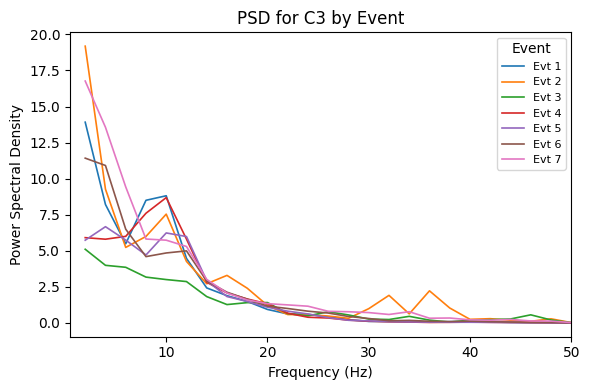

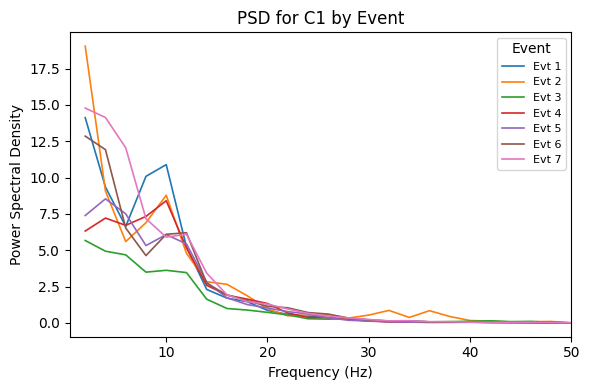

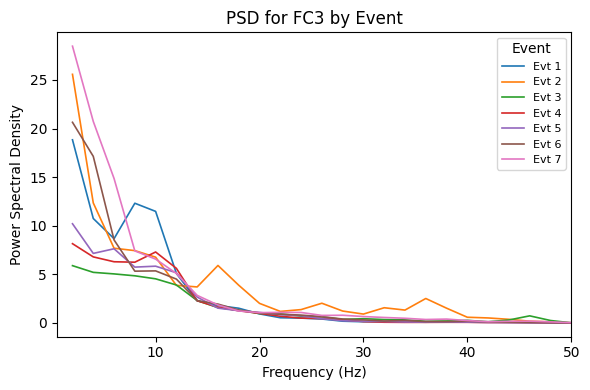

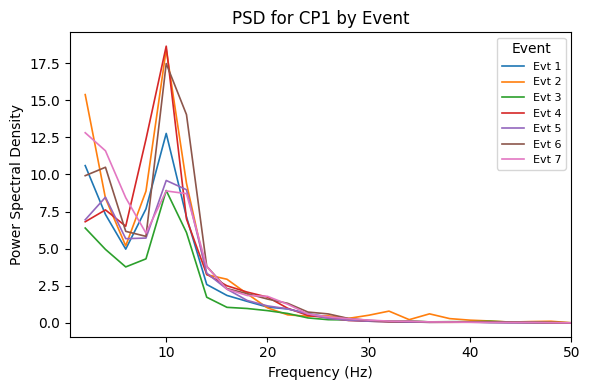

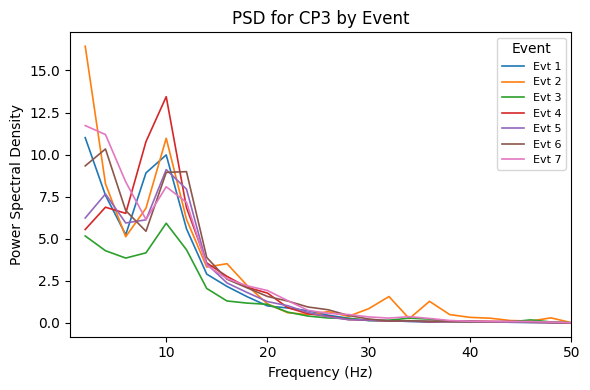

In [ ]:
channels = eeg_labels
for ch_name in ["C3","C1", "FC3", "CP1", "CP3"]:
    if ch_name not in channels:
        print(f"Channel {ch_name} not found, skipping")
        continue
    ch_idx = channels.index(ch_name)
    plt.figure(figsize=(6,4))
    for ev in events:
        plt.plot(freqs, psd_per_event[ev][ch_idx],
                 label=f"Evt {ev}", linewidth=1.2)
    plt.title(f"PSD for {ch_name} by Event")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power Spectral Density")
    plt.xlim(fmin, fmax)
    plt.legend(title="Event", fontsize=8)
    plt.tight_layout()
    plt.show()

In [ ]:
# Elbow Flexion/Extension: C3, C1, FC3, CP1, CP3
# Pronation/Supination: C3, C1, FC3, CP1, CP3
#Claw-Close/Claw-Open: C3, C1
# Overall hand movement: C3, C1

Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)


C:\Users\ik111\AppData\Local\Temp\ipykernel_11812\1864656995.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=[f"Evt{ev}" for ev in events], showfliers=False)


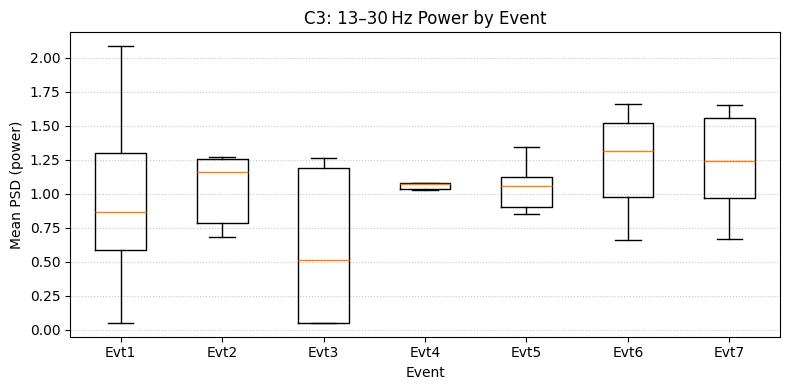

C:\Users\ik111\AppData\Local\Temp\ipykernel_11812\1864656995.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=[f"Evt{ev}" for ev in events], showfliers=False)


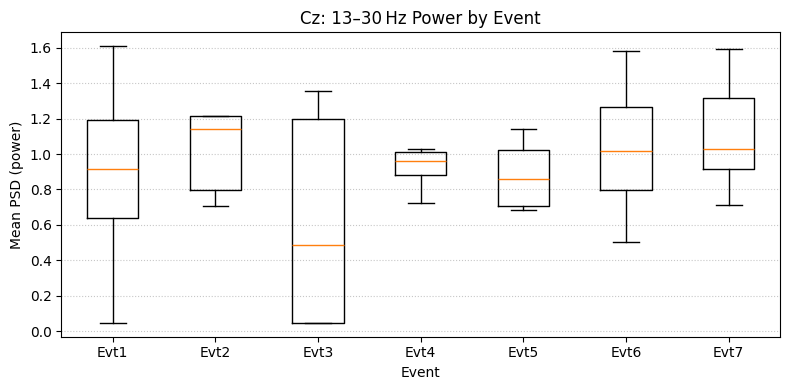

C:\Users\ik111\AppData\Local\Temp\ipykernel_11812\1864656995.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=[f"Evt{ev}" for ev in events], showfliers=False)


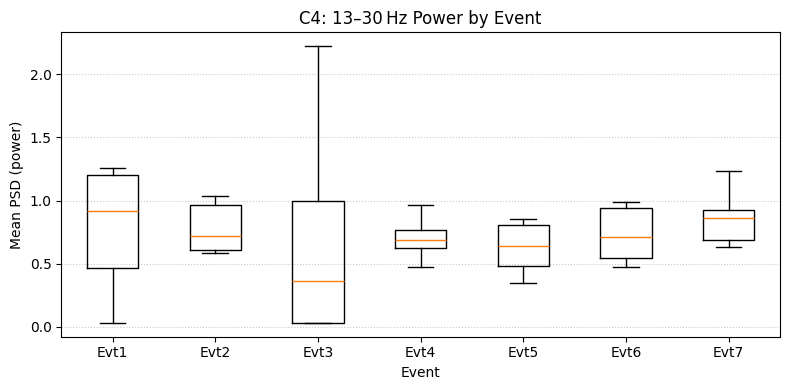

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mne.time_frequency import psd_array_welch

# ─── Prerequisite: X_list (list of (n_ch, n_times)) and y_list (list of labels 1–7)
X = np.stack(X_filled, axis=0)    # (n_epochs, n_ch, n_times)
y = np.array(y, dtype=int) # (n_epochs,)
# ─── Settings ───────────────────────────────────────────────────────────────
channels_of_interest = ['C3', 'Cz', 'C4']
sfreq = 512.0
n_fft = 256
# choose frequency band for boxplot (e.g. beta: 13–30 Hz)
band = (8, 30)

events = np.unique(y)

# ─── Compute band‐power per trial for each channel & event ───────────────────
power_data = {ch: {ev: [] for ev in events} for ch in channels_of_interest}

for ch in channels_of_interest:
    ch_idx = eeg_labels.index(ch)
    # extract time-series for this channel across epochs
    data_ch = X[:, ch_idx, :]  # shape (n_epochs, n_times)
    # compute PSD per epoch
    psds, freqs = psd_array_welch(
        data_ch, sfreq=sfreq,
        fmin=band[0], fmax=band[1],
        n_fft=n_fft, average='mean'
    )  # returns (n_epochs, n_freqs), (n_freqs,)
    # for each epoch, compute mean power across the band
    band_power_per_epoch = psds.mean(axis=1)  # shape (n_epochs,)
    # assign to events
    for ev in events:
        idx = np.where(y == ev)[0]
        power_data[ch][ev] = band_power_per_epoch[idx]

# ─── Plot a boxplot for each channel ─────────────────────────────────────────
for ch in channels_of_interest:
    data_to_plot = [power_data[ch][ev] for ev in events]
    plt.figure(figsize=(8,4))
    plt.boxplot(data_to_plot, labels=[f"Evt{ev}" for ev in events], showfliers=False)
    plt.title(f"{ch}: {band[0]}–{band[1]} Hz Power by Event")
    plt.xlabel("Event")
    plt.ylabel("Mean PSD (power)")
    plt.grid(axis='y', linestyle=':', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [ ]:
from mne.time_frequency import psd_array_welch

# X has shape (n_epochs, n_channels, n_times), y has labels 1…7
bands = {"mu": (8,12), "beta": (13,30)}
psd_feats = np.zeros((X_filled.shape[0], X_filled.shape[1], len(bands)))  # (epochs, channels, bands)

for i in range(X_filled.shape[0]):
    for ch in range(X_filled.shape[1]):
        psd, freqs = psd_array_welch(X_filled[i,ch,:], sfreq=512,
                                     fmin=8, fmax=30, n_fft=256)
        for b_idx, (fmin,fmax) in enumerate(bands.values()):
            mask = (freqs>=fmin)&(freqs<=fmax)
            psd_feats[i,ch,b_idx] = psd[mask].mean()

Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective wind

Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)


C:\Users\ik111\AppData\Local\Temp\ipykernel_11812\1344954104.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=[f"Evt{ev}" for ev in events], showfliers=False)
C:\Users\ik111\AppData\Local\Temp\ipykernel_11812\1344954104.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=[f"Evt{ev}" for ev in events], showfliers=False)
C:\Users\ik111\AppData\Local\Temp\ipykernel_11812\1344954104.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=[f"Evt{ev}" for ev in events], showfliers=False)
C:\Users\ik111\AppData\Local\Temp\ipykernel_11812\1344954104.py:

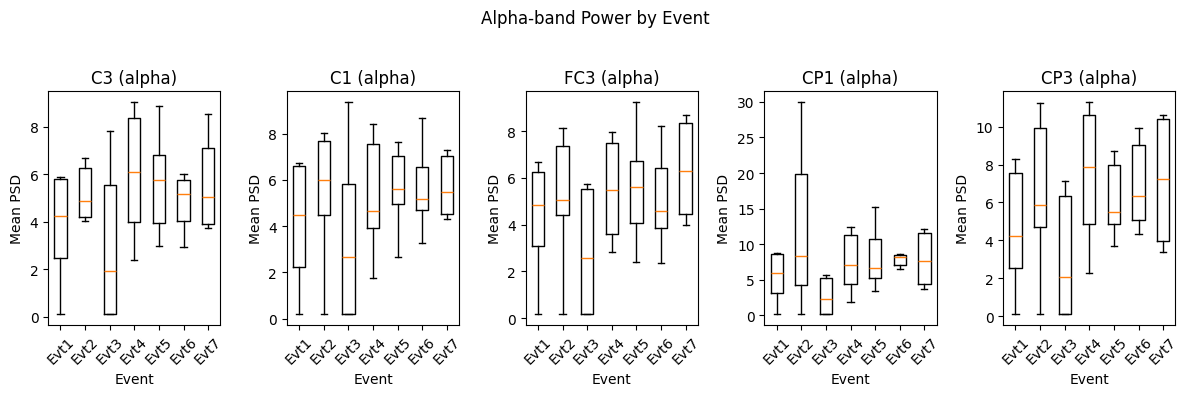

C:\Users\ik111\AppData\Local\Temp\ipykernel_11812\1344954104.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=[f"Evt{ev}" for ev in events], showfliers=False)
C:\Users\ik111\AppData\Local\Temp\ipykernel_11812\1344954104.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=[f"Evt{ev}" for ev in events], showfliers=False)
C:\Users\ik111\AppData\Local\Temp\ipykernel_11812\1344954104.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=[f"Evt{ev}" for ev in events], showfliers=False)
C:\Users\ik111\AppData\Local\Temp\ipykernel_11812\1344954104.py:

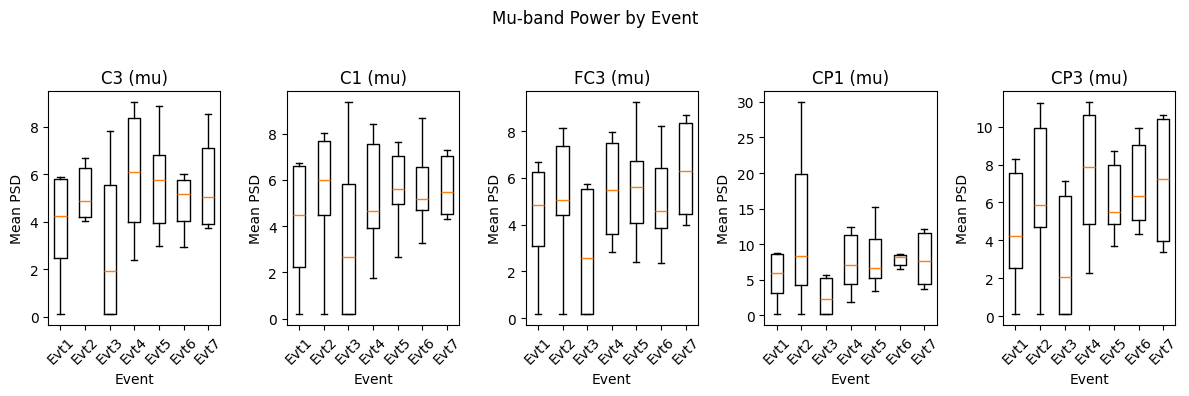

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mne.time_frequency import psd_array_welch

# ─── Prerequisite: X_list (list of (n_ch, n_times) arrays) and y_list (labels 1–7)
X = np.stack(X_filled, axis=0)   # (n_epochs, n_ch, n_times)
y = np.array(y)           # (n_epochs,)

# ─── 1) Define bands: alpha (8–12 Hz) and mu (8–13 Hz motor) ───────────────
bands = {'alpha': (8, 12), 'mu': (8, 13)}

sfreq = 512.0
n_fft = 256
events = np.unique(y)
channels = eeg_labels     # full channel list
ch_interest = ["C3","C1", "FC3", "CP1", "CP3"]

# ─── 2) Compute per-trial band-power for each band & channel ───────────────
power_data = {
    band: {ch: {} for ch in ch_interest}
    for band in bands
}

for band_name, (fmin, fmax) in bands.items():
    for ch_name in ch_interest:
        ch_idx = channels.index(ch_name)
        # compute PSD for all trials at this channel
        psds, freqs = psd_array_welch(
            X[:, ch_idx, :],
            sfreq=sfreq,
            fmin=fmin, fmax=fmax,
            n_fft=n_fft,
            average='mean'
        )  # psds shape: (n_epochs, n_freqs)
        band_power = psds.mean(axis=1)  # mean over freq axis → (n_epochs,)
        # group by event
        for ev in events:
            power_data[band_name][ch_name][ev] = band_power[y == ev]

# ─── 3) Plot boxplots ──────────────────────────────────────────────────────
for band_name in bands:
    fig, axes = plt.subplots(1, len(ch_interest), figsize=(12, 4))
    for ax, ch_name in zip(axes, ch_interest):
        data = [power_data[band_name][ch_name][ev] for ev in events]
        ax.boxplot(data, labels=[f"Evt{ev}" for ev in events], showfliers=False)
        ax.set_title(f"{ch_name} ({band_name})")
        ax.set_xlabel("Event")
        ax.set_ylabel("Mean PSD")
        ax.tick_params(axis='x', rotation=45)
    fig.suptitle(f"{band_name.capitalize()}-band Power by Event")
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


Windowed X shape: (10710, 10, 55)
Windowed y shape: (10710,)
Before casting:
  X_train dtype: float32 X_test dtype: float32
  y_train dtype: int32 y_test dtype: int32
After casting:
  X_train dtype: float32 X_test dtype: float32
  y_train dtype: int32 y_test dtype: int32
Epoch 1/10


C:\Users\ik111\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


201/201 - 4s - 20ms/step - accuracy: 0.2541 - loss: 1.8505 - val_accuracy: 0.3077 - val_loss: 1.7554
Epoch 2/10
201/201 - 1s - 6ms/step - accuracy: 0.3607 - loss: 1.6717 - val_accuracy: 0.3847 - val_loss: 1.6053
Epoch 3/10
201/201 - 1s - 6ms/step - accuracy: 0.4270 - loss: 1.5266 - val_accuracy: 0.4370 - val_loss: 1.5100
Epoch 4/10
201/201 - 1s - 6ms/step - accuracy: 0.4824 - loss: 1.4073 - val_accuracy: 0.4897 - val_loss: 1.4038
Epoch 5/10
201/201 - 1s - 6ms/step - accuracy: 0.5212 - loss: 1.3165 - val_accuracy: 0.4925 - val_loss: 1.3806
Epoch 6/10
201/201 - 1s - 6ms/step - accuracy: 0.5556 - loss: 1.2355 - val_accuracy: 0.5145 - val_loss: 1.3269
Epoch 7/10
201/201 - 1s - 6ms/step - accuracy: 0.5859 - loss: 1.1606 - val_accuracy: 0.5458 - val_loss: 1.2539
Epoch 8/10
201/201 - 1s - 6ms/step - accuracy: 0.6096 - loss: 1.0907 - val_accuracy: 0.5509 - val_loss: 1.2369
Epoch 9/10
201/201 - 1s - 6ms/step - accuracy: 0.6285 - loss: 1.0332 - val_accuracy: 0.5556 - val_loss: 1.2291
Epoch 10/10

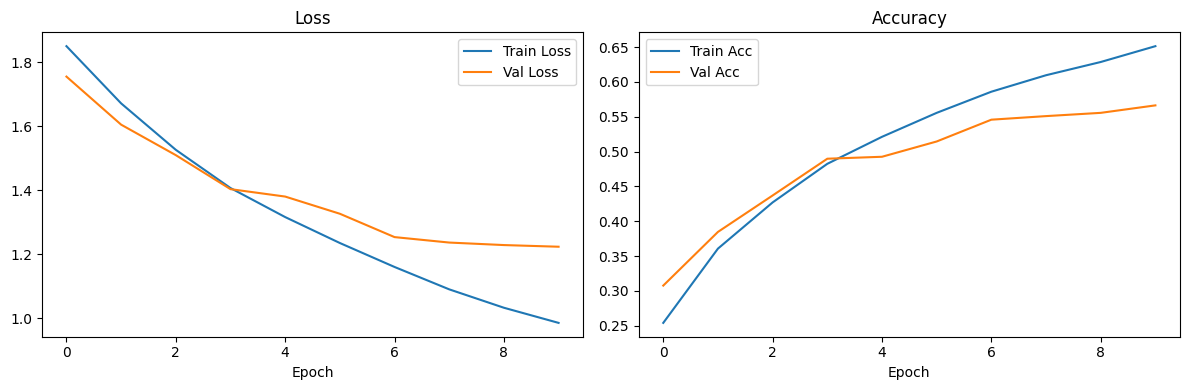

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# 1) Prepare sequence data for LSTM
# LSTM expects (samples, timesteps, features)
# we have (epochs, channels, times) → swap to (epochs, times, channels)
X_seq = np.transpose(X_filled, (0, 2, 1)).astype('float32')
# Adjust labels to be in the range [0, n_classes-1] and ensure a 1D array
y_seq = (y.astype('int32').squeeze() - 1)  # ensure integer dtype, 1D array, and adjust range

# ─── Before your train/test split ────────────────────────────────────────────

def sliding_windows(X, y, window_size, step=None):
    """
    Args:
      X: array, shape (n_epochs, n_times, n_channels)
      y: array, shape (n_epochs,)
      window_size: int, number of time‐steps per window
      step: int, how far to slide between windows (default = window_size//2)
    Returns:
      Xw: (n_windows, window_size, n_channels)
      yw: (n_windows,)   corresponding labels
    """
    if step is None:
        step = window_size // 2
    Xw, yw = [], []
    n_epochs, n_times, n_ch = X.shape
    for i in range(n_epochs):
        for start in range(0, n_times - window_size + 1, step):
            Xw.append(X[i, start:start+window_size, :])
            yw.append(y[i])
    return np.array(Xw, dtype='float32'), np.array(yw, dtype='int32')

# ─── Example usage ───────────────────────────────────────────────────────────
window_size = 10   # <— your “window size”
step        = 5    # e.g. half‐overlap

# suppose X_seq has shape (n_epochs, n_times, n_channels) and y_classes (n_epochs,)
X_windows, y_windows = sliding_windows(X_seq, y_seq, window_size, step)

print("Windowed X shape:", X_windows.shape)  # (n_windows, 10, n_channels)
print("Windowed y shape:", y_windows.shape)  # (n_windows,)

# Now split *these* windows into train/val/test instead of the full‐epoch data
X_tr, X_temp, y_tr, y_temp = train_test_split(
    X_windows, y_windows,
    test_size=0.4,
    random_state=42,
    stratify=y_windows
)
X_val, X_te, y_val, y_te = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)

# 1) Debug print
print("Before casting:")
print("  X_train dtype:", X_tr.dtype, "X_test dtype:",  X_te.dtype)
print("  y_train dtype:", y_tr.dtype, "y_test dtype:",  y_te.dtype)

# 2) Force numeric types
X_train = X_tr.astype('float32')
X_test  = X_te.astype('float32')
y_train = y_tr.astype('int32')
y_test  = y_te.astype('int32')

print("After casting:")
print("  X_train dtype:", X_train.dtype, "X_test dtype:",  X_test.dtype)
print("  y_train dtype:", y_train.dtype, "y_test dtype:",  y_test.dtype)

# 3) Build & compile
model = Sequential([
    LSTM(50, return_sequences=True,
         input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(7, activation='softmax'),
])
model.compile(
    optimizer=Adam(1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 4) Train
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10, batch_size=32, verbose=2
)


# 5) Evaluate on held-out test set
test_loss, test_acc = model.evaluate(X_te, y_te, batch_size=32, verbose=0)
print(f"\nTest loss: {test_loss:.4f} | Test accuracy: {test_acc:.2%}")

# 6) Plot learning curves
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],   label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],   label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/10


C:\Users\ik111\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


201/201 - 2s - 9ms/step - accuracy: 0.1925 - loss: 2.4007 - val_accuracy: 0.2829 - val_loss: 1.8402
Epoch 2/10
201/201 - 1s - 3ms/step - accuracy: 0.2625 - loss: 1.8370 - val_accuracy: 0.3095 - val_loss: 1.7695
Epoch 3/10
201/201 - 1s - 3ms/step - accuracy: 0.3192 - loss: 1.7497 - val_accuracy: 0.3744 - val_loss: 1.6711
Epoch 4/10
201/201 - 1s - 3ms/step - accuracy: 0.3687 - loss: 1.6550 - val_accuracy: 0.3889 - val_loss: 1.6158
Epoch 5/10
201/201 - 1s - 3ms/step - accuracy: 0.4018 - loss: 1.5823 - val_accuracy: 0.4234 - val_loss: 1.5199
Epoch 6/10
201/201 - 1s - 3ms/step - accuracy: 0.4555 - loss: 1.4782 - val_accuracy: 0.4879 - val_loss: 1.4029
Epoch 7/10
201/201 - 1s - 3ms/step - accuracy: 0.4970 - loss: 1.3824 - val_accuracy: 0.5247 - val_loss: 1.3268
Epoch 8/10
201/201 - 1s - 3ms/step - accuracy: 0.5174 - loss: 1.3380 - val_accuracy: 0.5350 - val_loss: 1.3001
Epoch 9/10
201/201 - 1s - 3ms/step - accuracy: 0.5447 - loss: 1.2763 - val_accuracy: 0.5406 - val_loss: 1.2643
Epoch 10/10


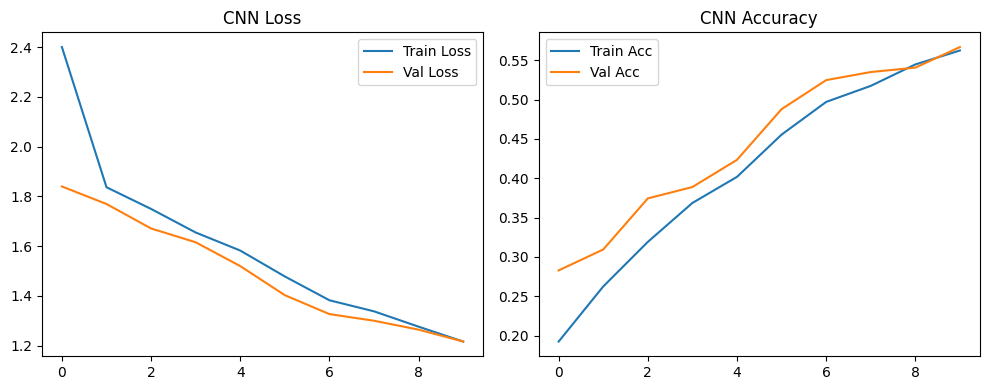

RF Val Acc: 52.85% | RF Test Acc: 51.17%

Model Comparison:
LSTM Test Acc: 56.63%
CNN  Test Acc: 55.60%
RF   Test Acc: 51.17%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# ─── Assume sliding windows & splits are done ───────────────────────────────
# X_train, X_val, X_test: (n_samples, window_size, n_channels)
# y_train, y_val, y_test: (n_samples,)
window_size, n_channels = X_train.shape[1], X_train.shape[2]
n_classes = len(np.unique(y_train))

# ─── 1) Build & train a simple 1D-CNN ──────────────────────────────────────
model_cnn = Sequential([
    Conv1D(32, kernel_size=3, activation='relu',
           input_shape=(window_size, n_channels)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(n_classes, activation='softmax')
])
model_cnn.compile(
    optimizer=Adam(1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
history_cnn = model_cnn.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10, batch_size=32, verbose=2
)
# Evaluate CNN
loss_cnn, acc_cnn = model_cnn.evaluate(X_test, y_test, verbose=0)
print(f"CNN Test Loss: {loss_cnn:.4f} | CNN Test Acc: {acc_cnn:.2%}")

# Plot CNN learning curves
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Val Loss')
plt.title('CNN Loss'); plt.legend()
plt.subplot(1,2,2)
plt.plot(history_cnn.history['accuracy'], label='Train Acc')
plt.plot(history_cnn.history['val_accuracy'], label='Val Acc')
plt.title('CNN Accuracy'); plt.legend()
plt.tight_layout()
plt.show()

# ─── 2) Train & evaluate Random Forest ─────────────────────────────────────
X_tr_rf = X_train.reshape(X_train.shape[0], -1)
X_val_rf= X_val.reshape(X_val.shape[0], -1)
X_te_rf = X_test.reshape(X_test.shape[0], -1)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_tr_rf, y_train)
y_val_pred = rf.predict(X_val_rf)
y_test_pred = rf.predict(X_te_rf)

val_acc_rf = accuracy_score(y_val, y_val_pred)
test_acc_rf = accuracy_score(y_test, y_test_pred)
print(f"RF Val Acc: {val_acc_rf:.2%} | RF Test Acc: {test_acc_rf:.2%}")

# ─── 3) Summary of comparison ───────────────────────────────────────────────
print("\nModel Comparison:")
print(f"LSTM Test Acc: {test_acc:.2%}")  # from previous LSTM run
print(f"CNN  Test Acc: {acc_cnn:.2%}")
print(f"RF   Test Acc: {test_acc_rf:.2%}")
